# Visualizing Earnings Based on College Majors 

## Introduction

In this project we will use data visualization to analyze the job outcomes of students who graduated from US colleges between 2010 and 2012. 

We will use a dataset which was originally compiled by the America Community Survey. However we will work with a cleaned version of this dataset which was released by FiveThirtyEight on this [Github repo](https://github.com/fivethirtyeight/data/tree/master/college-majors). 

Before diving right into it, let's import all the necessary libraries and options...

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option("display.max_columns", None)

...and the magic command that will make Jupyter display all the plots inline.

In [2]:
%matplotlib inline

Ok, now we are all ready: LET THE SHOW START!

---

## Initial Exploration of the Data

First things first: let's open the CSV file containing the dataset and let's take a first look to familiarize with it.

In [3]:
recent_grads = pd.read_csv("recent-grads.csv")

In [4]:
# Print first and last five rows
recent_grads.head(5)
recent_grads.tail(5)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,5043,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,1848,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,1724,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,3154,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,593,237,410,87,0.104946,22000,20000,22000,288,338,192


In [5]:
# Print (number of rows, number of columns)
recent_grads.shape

(173, 21)

The dataframe consists of 173 rows, each of them corresponding to a different major. Statistical information related to these majors' graduates and their employment status is presented across 21 columns. 

Below, we detail the content of the most relevant columns (the ones we'll focus on); for information about the remaining columns, the reader can refer to the *readme.md* file contained in the repo we linked in the Introduction.    

- `Rank`: Rank by median earnings;
- `Major`: Major description;
- `Major_category`: Category of major;
- `Total`: Total number of graduates within the major;
- `Men`: Number of male graduates;
- `Women`: Number of women graduates;
- `ShareWomen`: Percentage of female graduates;
- `Employed`: Number of employed graduates;
- `Full_time`: Number of employed graduates working 35 weekly hours or more;
- `Part_time`: Number of employed graduates working less than 35 weekly hours;
- `Unemployment_rate`: Percentage of unemployed graduates;
- `Median`: Median salary of full-time, year-round worker;
- `Sample_size`: Sample size used to calculate median salaries (the population considered is full-time, year-round employed graduates only).

Before moving on, let's assign slighlty more descriptive names to some of the columns. 

In [6]:
recent_grads.rename(columns = {"Total" : "Total_graduates", "Men" : "Men_graduates",
                               "Women" : "Women_graduates", "Employed" : "Total_employed", 
                               "Full_time" : "Full_time_employed", "Part_time" : "Part_time_employed",
                               "Median": "Median_salary"}, inplace = True)

Looking back at the few rows we displayed above, one recognizes the dataset is order by the `Rank` column in ascending order. This means we don't need to sweat a tear in order to find out what is the highest paying major (yeah yeah, petroleum engineers, I know it's you; everyone can see you up there, no need to brag about it).

In [7]:
# Print null values count
recent_grads.isnull().sum()

Rank                    0
Major_code              0
Major                   0
Total_graduates         1
Men_graduates           1
Women_graduates         1
Major_category          0
ShareWomen              1
Sample_size             0
Total_employed          0
Full_time_employed      0
Part_time_employed      0
Full_time_year_round    0
Unemployed              0
Unemployment_rate       0
Median_salary           0
P25th                   0
P75th                   0
College_jobs            0
Non_college_jobs        0
Low_wage_jobs           0
dtype: int64

~~Luckily for us, it seems like the data...~~ sorry, SORRY, I am really sorry but I can't hold off my curiosity: before moving on I HAVE TO find out how my major ranks. I've got a feeling I might regret this decision but let's see.

In [8]:
# Find the rank of Mathematics major (i.e., my major)
recent_grads.loc[recent_grads["Major"] == "MATHEMATICS", ["Rank", "Major"]]

,Rank,Major
41,42,MATHEMATICS


Oh look at that, we made it to the top 50: that's not bad at all. 

Anyways, I was saying: luckily for us, it seems like the data doesn't need much cleaning. Only 4 of the 21 columns contain null values and, the ones that do, only contain a single one. Let's see how we can take care of this missing data.

In [9]:
# Get the row count of current dataframe (we already know it's 173) 
raw_data_row_count = recent_grads.shape[0]

In [10]:
# Drop any row with at least a null value and get the row count of this new dataframe
cleaned_recent_grads = recent_grads.dropna(axis = 0)
cleaned_data_row_count = cleaned_recent_grads.shape[0]

In [11]:
print(f"The original dataframe contains {raw_data_row_count} rows.")
print(f"After dropping rows with null values the dataframe contains {cleaned_data_row_count} rows.")

The original dataframe contains 173 rows.
After dropping rows with null values the dataframe contains 172 rows.


Oh, amazing! By dropping the rows containing null values, we only lost one datapoint. This means that the 4 missing values must have all appeared in the same row. 

Since we want to do some data visualization and `matplotlib` doesn't know how to handle null values, I'll just go ahead and get rid of this incomplete row.

In [12]:
recent_grads = cleaned_recent_grads

Let's get more information about the columns.

In [13]:
# Print the columns info
recent_grads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 0 to 172
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  172 non-null    int64  
 1   Major_code            172 non-null    int64  
 2   Major                 172 non-null    object 
 3   Total_graduates       172 non-null    float64
 4   Men_graduates         172 non-null    float64
 5   Women_graduates       172 non-null    float64
 6   Major_category        172 non-null    object 
 7   ShareWomen            172 non-null    float64
 8   Sample_size           172 non-null    int64  
 9   Total_employed        172 non-null    int64  
 10  Full_time_employed    172 non-null    int64  
 11  Part_time_employed    172 non-null    int64  
 12  Full_time_year_round  172 non-null    int64  
 13  Unemployed            172 non-null    int64  
 14  Unemployment_rate     172 non-null    float64
 15  Median_salary         1

Nearly all columns are of numeric type (most of them integer, a few of them float): keeping in mind the description of their content which we gave after loading the CSV file, this makes total sense. 

To get a collective idea of what values to expect, let's take a look at some summary statistics of each numeric column.  

In [14]:
# Print summary statistics of numeric columns
recent_grads.describe()

,Rank,Major_code,Total_graduates,Men_graduates,Women_graduates,ShareWomen,Sample_size,Total_employed,Full_time_employed,Part_time_employed,Full_time_year_round,Unemployed,Unemployment_rate,Median_salary,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.00000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000
mean,87.377907,3895.953488,39370.081395,16723.406977,22646.674419,0.522223,357.941860,31355.80814,26165.767442,8877.232558,19798.843023,2428.412791,0.068024,40076.744186,29486.918605,51386.627907,12387.401163,13354.325581,3878.633721
std,49.983181,1679.240095,63483.491009,28122.433474,41057.330740,0.231205,619.680419,50777.42865,42957.122320,14679.038729,33229.227514,4121.730452,0.030340,11461.388773,9190.769927,14882.278650,21344.967522,23841.326605,6960.467621
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.00000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.750000,2403.750000,4549.750000,2177.500000,1778.250000,0.336026,42.000000,3734.75000,3181.000000,1013.750000,2474.750000,299.500000,0.050261,33000.000000,24000.000000,41750.000000,1744.750000,1594.000000,336.750000
50%,87.500000,3608.500000,15104.000000,5434.000000,8386.500000,0.534024,131.000000,12031.50000,10073.500000,3332.500000,7436.500000,905.000000,0.067544,36000.000000,27000.000000,47000.000000,4467.500000,4603.500000,1238.500000
75%,130.250000,5503.250000,38909.750000,14631.000000,22553.750000,0.703299,339.000000,31701.25000,25447.250000,9981.000000,17674.750000,2397.000000,0.087247,45000.000000,33250.000000,58500.000000,14595.750000,11791.750000,3496.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.00000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


We notice some suspicious minimum values in a few of the columns. Let's take a closer look at this issue.

In [15]:
# Show majors with no women graduates or no employed graduates
mask = (recent_grads["Women_graduates"] == 0) | (recent_grads["Total_employed"] == 0)
recent_grads[mask]

,Rank,Major_code,Major,Total_graduates,Men_graduates,Women_graduates,Major_category,ShareWomen,Sample_size,Total_employed,Full_time_employed,Part_time_employed,Full_time_year_round,Unemployed,Unemployment_rate,Median_salary,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
73,74,3801,MILITARY TECHNOLOGIES,124.0,124.0,0.0,Industrial Arts & Consumer Services,0.0,4,0,111,0,111,0,0.0,40000,40000,40000,0,0,0


I guess it's possible no women graduated in *Military Technologies* but the values in `Employed` and `Full_time` are clearly conflicting. Since a few additional columns have fishy zero values, rather than taking the risk of using corrupted data, I prefer to get rid of this major.  

In [16]:
# Drop the Military Technologies major (it has invalid values)
recent_grads.drop(73, axis = 0, inplace = True)

We might still have rows with zero values in the `Unemployed` and `Unemployment_rate` columns. That sounds too good to be true. Let's investigate.  

In [17]:
# Show majors with no unemployed graduates or no unemployment rate
mask = (recent_grads["Unemployed"] == 0) | (recent_grads["Unemployment_rate"] == 0)
recent_grads[mask]

,Rank,Major_code,Major,Total_graduates,Men_graduates,Women_graduates,Major_category,ShareWomen,Sample_size,Total_employed,Full_time_employed,Part_time_employed,Full_time_year_round,Unemployed,Unemployment_rate,Median_salary,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
52,53,4005,MATHEMATICS AND COMPUTER SCIENCE,609.0,500.0,109.0,Computers & Mathematics,0.178982,7,559,584,0,391,0,0.0,42000,30000,78000,452,67,25
83,84,3602,BOTANY,1329.0,626.0,703.0,Biology & Life Science,0.528969,9,1010,946,169,740,0,0.0,37000,26000,40000,677,184,56
112,113,1106,SOIL SCIENCE,685.0,476.0,209.0,Agriculture & Natural Resources,0.305109,4,613,488,185,383,0,0.0,35000,18500,44000,355,144,0
120,121,2301,EDUCATIONAL ADMINISTRATION AND SUPERVISION,804.0,280.0,524.0,Education,0.651741,5,703,733,0,504,0,0.0,34000,29000,35000,346,206,111


For these four majors, the number of total graduates is strictly greater than the number of employed graduates so the zero values in the `Unemployed` and `Unemployment_rate` columns must be wrong. Luckily, we can quickly calculate the correct values using basic operations on the other information we have.

In [18]:
# Calculate "Unemployed graduates" as "Total graduates" - "Employed graduates"
recent_grads.loc[mask, "Unemployed"] = recent_grads.loc[mask, "Total_graduates"] - recent_grads.loc[mask, "Total_employed"]

# Calculate "Unemployment rate" as "Unemployed graduates" / "Total graduates"
recent_grads.loc[mask, "Unemployment_rate"] = recent_grads.loc[mask, "Unemployed"] / recent_grads.loc[mask, "Total_employed"]

In [19]:
# Look back at the updated columns summary statistics
recent_grads.describe()

,Rank,Major_code,Total_graduates,Men_graduates,Women_graduates,ShareWomen,Sample_size,Total_employed,Full_time_employed,Part_time_employed,Full_time_year_round,Unemployed,Unemployment_rate,Median_salary,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000
mean,87.456140,3896.508772,39599.590643,16820.479532,22779.111111,0.525277,360.011696,31539.175439,26318.134503,8929.146199,19913.976608,2445.783626,0.072319,40077.192982,29425.438596,51453.216374,12459.842105,13432.421053,3901.315789
std,50.119412,1684.155957,63598.326310,28176.109465,41141.047383,0.228378,620.903734,50869.408650,43036.642009,14706.304837,33292.391735,4127.810734,0.034398,11495.047796,9182.221262,14900.265637,21386.438959,23889.270685,6974.531378
min,1.000000,1100.000000,609.000000,119.000000,77.000000,0.077453,2.000000,559.000000,488.000000,0.000000,340.000000,11.000000,0.006334,22000.000000,18500.000000,22000.000000,162.000000,50.000000,0.000000
25%,44.500000,2403.500000,4628.500000,2268.500000,1829.000000,0.340248,43.500000,3815.500000,3197.000000,1035.000000,2537.500000,308.000000,0.052384,33000.000000,24000.000000,42000.000000,1788.000000,1624.500000,341.500000
50%,88.000000,3608.000000,15150.000000,5521.000000,8489.000000,0.535714,132.000000,12266.000000,10099.000000,3366.000000,7460.000000,917.000000,0.069163,36000.000000,27000.000000,47000.000000,4545.000000,4612.000000,1246.000000
75%,130.500000,5503.500000,38975.500000,14822.000000,22651.500000,0.704578,340.000000,31969.500000,25747.500000,10014.000000,18458.500000,2401.000000,0.089499,45000.000000,33000.000000,59000.000000,14747.500000,11800.500000,3526.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.315842,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


Ok, much better. I do have, however, one last small objection to make: the values in the `Unemployment_rate` and `ShareWomen` columns are in a scale of 0 to 1; I find it more intuitive to work with percentages so let me change that.

In [20]:
# Change scale of percentages columns (from "0 to 1" to "0 to 100")
recent_grads["Unemployment_rate"] = recent_grads["Unemployment_rate"] * 100
recent_grads["ShareWomen"] = recent_grads["ShareWomen"] * 100

In [21]:
# Rename these columns to make it even more clear we are talking about percentages
recent_grads.rename(columns = {"Unemployment_rate" : "Unemployment_rate%", "ShareWomen" : "Women_graduates%"}, inplace = True)

Now that we have cleaned our data, we are ready to analyze it using some plots.

---

## Let's Talk Money

First of all let's try to figure out how much money new graduates make.

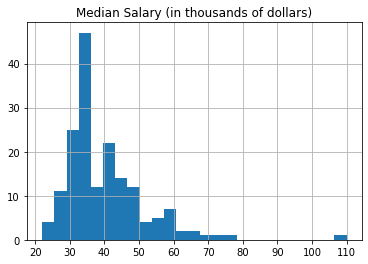

In [22]:
# Plot histogram of median salaries values
ax = (recent_grads["Median_salary"] / 1000).hist(bins = 25) # We display salaries using the thousand unit in order not
                                                     # to crowd the ticks labels on the x-axis
plt.xticks(np.arange(20, 120,10))    # We choose this range keeping in mind the min/max values we saw above
ax.set_title("Median Salary (in thousands of dollars)");

From the histogram above we can infer that most of the students who graduated from a US institution between 2010 and 2012 landed a job that guarantees them a median salary between \\$29,800 and \\$43,300.

Overall, the most common median salary ranges between \\$33,300 and \\$36,600. Moreover, the median salary of the richest major (which we've seen it quantifies exactly to \\$110,000 and belongs to the *Petroleum Engineering* major) is way above all other ones (specifically, it is 46% higher than the median salary of the second ranking major). 

It's hard to comment on the health status of the labor market using these raw numbers without taking into considerations additional factors like inflation or the cost of living (for example, a median salary of \\$35,000 would be much less valuable in a big and expensive city like New York than in other parts of the country which are more rural).

Perhaps, it would make more sense to compare these numbers with analogous data from a period immediately preceding the one we are considering to see if the job perspectives for new graduates have improved or not. For now let's make sure the sample size used to calculate these earnings is significant.

In [23]:
# Calculate what percentage of the population was sampled for each major
# Remember the population consists of the full-time, year-round employed graduates
sample_size_perc = recent_grads["Sample_size"] / recent_grads["Full_time_year_round"] * 100

In [24]:
# Print summary statistics of population and sample size
sample_size = pd.DataFrame({"Population_size" : recent_grads["Full_time_year_round"],
                            "Sample_size" : recent_grads["Sample_size"], "Sample_size%" : sample_size_perc})
sample_size.describe()

,Population_size,Sample_size,Sample_size%
count,171.000000,171.000000,171.000000
mean,19913.976608,360.011696,1.763992
std,33292.391735,620.903734,0.478238
min,340.000000,2.000000,0.416165
25%,2537.500000,43.500000,1.517942
50%,7460.000000,132.000000,1.769812
75%,18458.500000,340.000000,2.083113
max,199897.000000,4212.000000,3.002309


Oh man, these are pretty small sample sizes. In fact, a general rule of thumb for choosing a sample size that would yield representative results is to survey [10% of the population up to a maximum of 1000](https://tools4dev.org/resources/how-to-choose-a-sample-size/#:~:text=A%20good%20maximum%20sample%20size%20is%20usually%20around%2010%25%20of,the%20maximum%20would%20be%201000.) (and with a fixed minimum of 100 individuals). The numbers we have here are not even close to that. 

I guess we will just have to live with it. Let's move on.

In order to get a less granular and more practical picture, rather than looking at each single major, let's see what are the richest major categories. 

In [25]:
# Prepare the data to be plot
salary_by_maj_cat = recent_grads.groupby("Major_category")["Median_salary"].mean().sort_values()

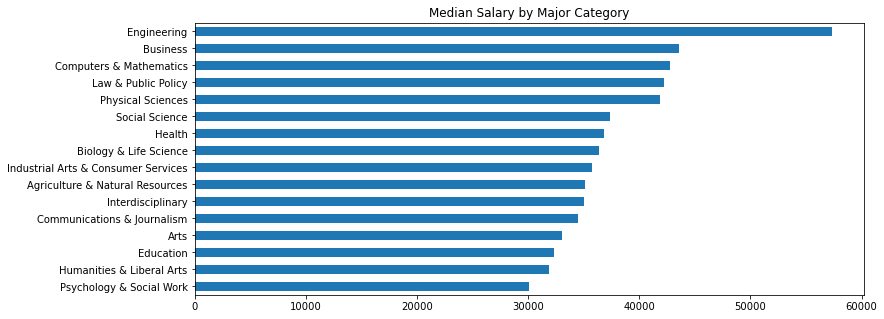

In [26]:
# Plot median salary by major category
ax = salary_by_maj_cat.plot(kind = "barh", figsize = (12, 5)) 
ax.set_ylabel("");
ax.set_title("Median Salary by Major Category");

*Engineering* is by far the category of major that makes you more rich and guarantees you a salary of about $57,500, which is almost 60% higher than the median of all salaries throughout all majors. *Business* comes in second (\\$44,500) followed by *Computers & Mathematics*, *Law & Public Policy* and *Physical Science* (all three of them around \\$42,500).

These numbers seem to confirm that nowadays jobs in STEM are among the most desirable, at least from a financial point of view. 

## More Money = More Popular?

In this section we will try to answer the following question: do majors which guarantee access to higher paying jobs also tend to be the ones with more graduates? To be honest, throughout my whole academic life, I have never met anyone who studied either Petroleum, Mining or Metallurgic Engineering (the three richest majors) so I'll put my virtual dollar on the "No" side but let's see.  

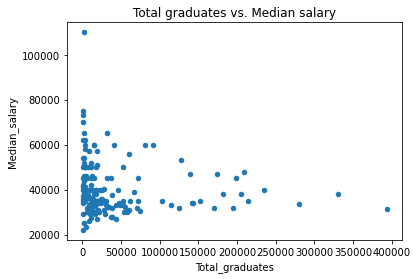

In [27]:
# Draw "Number of graduates" vs "Median salary" scatterplot
ax = recent_grads.plot(x = "Total_graduates", y = "Median_salary", kind = "scatter")
ax.set_title("Total graduates vs. Median salary");

It looks like I was right. There is no clear correlation between number of graduates and median salary. In fact, we observe the highest median salary values (together with the greatest variance) in those majors with a small number of graduates (25,000 or less).

Actually, none of the most popular majors (those with at least 150,000 graduates) guarantee a median salary above \\$50,000.

## The 82 Cents on the Dollar Gap

It's no secret that equal pay for men and women is an important battle far from being won. Indeed, [it is estimated](https://www.aauw.org/resources/research/simple-truth/#:~:text=Women%20working%20full%20time%20in%20the%20U.S.%20are%20still%20paid%20just%2083%20cents%20to%20every%20dollar%20earned%20by%20men) that for every dollar a man earns, a woman working the same job will be payed 82 cents.

The dataset we are using contains a lot of gender related information. Let's take advantage of this and let's see if we can find any insights on the pay gap issue.  

First of all let's see what percentage of majors have more male/female graduates.

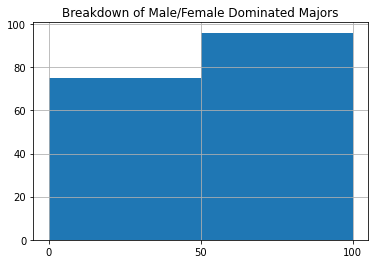

In [28]:
# Visualize male/female dominated majors using a two-bins histogram of the Women graduates %  
ax = recent_grads["Women_graduates%"].hist(bins = 2, range=(0, 100))
plt.xticks([0,50,100])
ax.set_title("Breakdown of Male/Female Dominated Majors");

In the plot above the height of the bin on the left represents the number of majors with more men graduates than women graduates; conversely, the height of the bin on the right represents the number of majors with more women graduates than men graduates.

We infer that roughly 96 out of the 171 majors (a total of 56%) have a predominantly female graduates population.

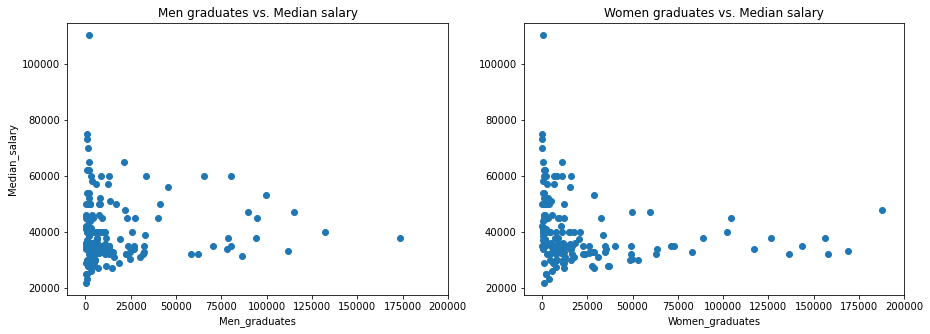

In [29]:
fig = plt.figure(figsize = (15, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.scatter(x = recent_grads["Men_graduates"], y = recent_grads["Median_salary"])
ax1.set_xlabel("Men_graduates");
ax1.set_ylabel("Median_salary");
ax1.set_title("Men graduates vs. Median salary");
ax1.set_xlim((-10000, 200000));


ax2.scatter(x = recent_grads["Women_graduates"], y = recent_grads["Median_salary"])
ax2.set_xlabel("Women_graduates");
ax2.set_title("Women graduates vs. Median salary");
ax2.set_xlim((-10000, 200000));

The two scatterplots above don't show any strong correlation between the number of men/women graduates and the median salary. They are both very much skewed right (indicating the presence of a large number of smaller majors with limited number of graduates) and they look very similar within the 0 to 25,000 range on the x-axis. 

As the number of graduates increases, however, we do notice that the median salary for a man tends to be higher than the one for a woman.

Let's draw an additional scatterplot to relate the median salary with the percentage of women graduates.

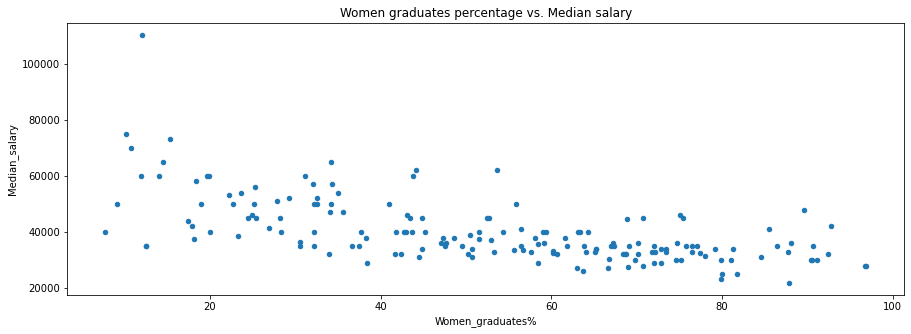

In [30]:
# Draw Women graduates percentage vs. Median salary scatterplot
ax3 = recent_grads.plot(x = "Women_graduates%", y = "Median_salary", kind = "scatter", figsize = (15, 5))
ax3.set_title("Women graduates percentage vs. Median salary");

This time it is possible to observe a pretty clear negative correlation between the percentage of women graduates in a major and the median salary. This could very possibly be a reflection of the gender pay gap issue but, in order to get more evidence, let's also use barplots to visualize the representation of men/women graduates in the majors which yield the highest and lowest median salaries.

In [31]:
# Set colors to use
blue = "#0000ff"   # Blue for men
pink = "#ff9999"   # Pink for women 

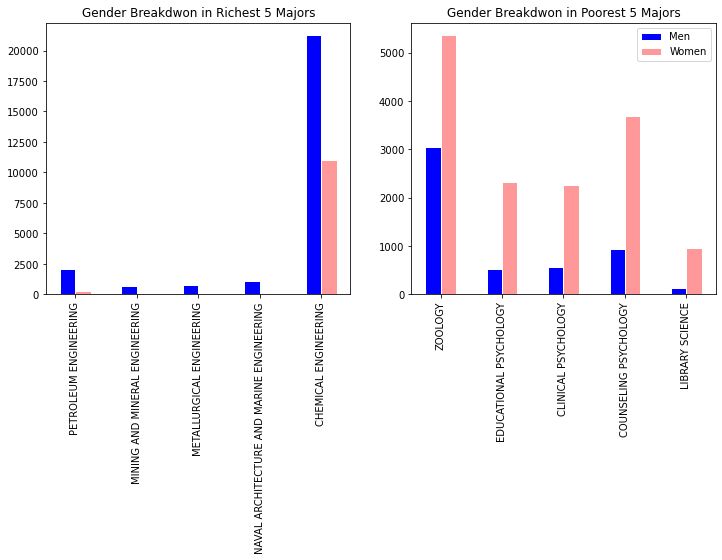

In [32]:
# Set width of bar
barWidth = 0.25

fig = plt.figure(figsize = (12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
 
# Set height of bars
barsM_rich = recent_grads.iloc[:5]["Men_graduates"].values;
barsW_rich = recent_grads.iloc[:5]["Women_graduates"].values;
barsM_poor = recent_grads.iloc[-5:]["Men_graduates"].values;
barsW_poor = recent_grads.iloc[-5:]["Women_graduates"].values;
 
# Set position of bars on x-axis
r1 = np.arange(len(barsM_rich));
r2 = [x + barWidth for x in r1];
 
# Make the vertical barplot for the richest majors
ax1.bar(r1, barsM_rich, color = blue, width=barWidth, edgecolor='white', label='Men')
ax1.bar(r2, barsW_rich, color= pink, width=barWidth, edgecolor='white', label='Women')

# Make the vertical barplot for the poorest majors
ax2.bar(r1, barsM_poor, color = blue, width=barWidth, edgecolor='white', label='Men')
ax2.bar(r2, barsW_poor, color= pink, width=barWidth, edgecolor='white', label='Women')
 
# Add xticks and labels in the middle of the grouped bars
ax1.set_xticks([r + barWidth / 2 for r in range(len(barsM_rich))]);
ax1.set_xticklabels(recent_grads.iloc[:5]["Major"].values, rotation = 90);
ax2.set_xticks([r + barWidth / 2 for r in range(len(barsM_rich))]);
ax2.set_xticklabels(recent_grads.iloc[-5:]["Major"].values, rotation = 90);
 
# Add titles
ax1.set_title("Gender Breakdwon in Richest 5 Majors");
ax2.set_title("Gender Breakdwon in Poorest 5 Majors");
    
# Create legend
ax2.legend(loc = "upper right");

The two graphs above depict a very polarizing situation: all top 5 majors are predominantly male and all bottom 5 majors are predominantly female. This is certainly not a good look. Such an extreme situation suggests that the gender pay gap is very much a real problem.

Let's see if we obtain a similar picture when we group by major category.

In [33]:
# Set lenght of bars
barsM = recent_grads.groupby("Major_category")["Men_graduates"].sum()
barsW = recent_grads.groupby("Major_category")["Women_graduates"].sum()

# Get a list of major categories ordered by median salary and use this order to rearrange the bars
majors_cat_by_salary = list(salary_by_maj_cat.sort_values().index)
barsM = barsM.reindex(majors_cat_by_salary)
barsW = barsW.reindex(majors_cat_by_salary)

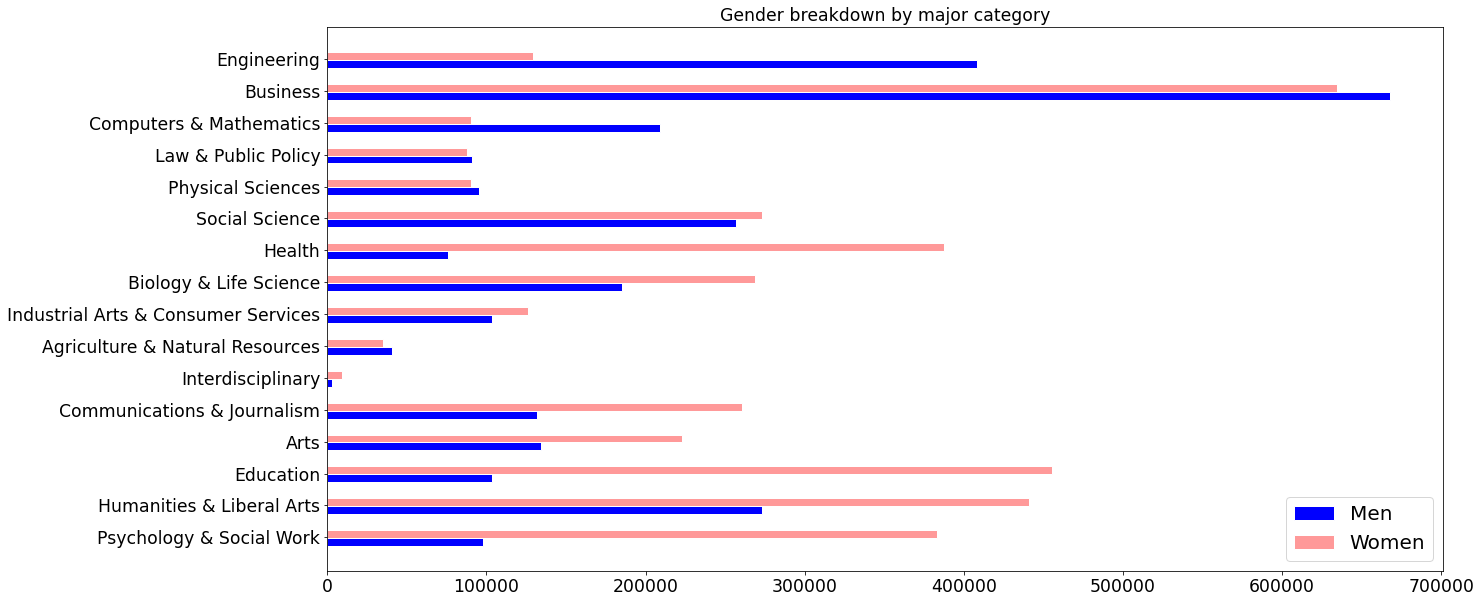

In [34]:
plt.figure(figsize=(20,10))

# Set position of bars on y-axis
r1 = np.arange(10, 330, 20);
r2 = [x + 5 for x in r1];

# Make the horizontal barplot
plt.barh(r1, barsM.values, 5, color = blue, edgecolor='white', label = "Men");
plt.barh(r2, barsW.values, 5, color= pink, edgecolor='white', label = "Women");

# Add yticks and labels in the middle of the grouped bars
plt.yticks(r1 + 3, barsM.index);

# Increase size of ticks labels
plt.tick_params(axis = "both", labelsize = "xx-large");

# Make title
plt.title("Gender breakdown by major category", fontsize = "xx-large");

# Make legend
plt.legend(prop={'size': 20});

In the bar plot above the major categories appear in rank order, with the richest ones appearing on top and the poorest ones on the bottom. We can see how the top 5 major categories are all predominantly male. This is even more remarkable given the fact that, among all major categories, only 6 of them produce more men graduates than women graduates.

All this evidence exposes very clearly the gender pay gap problem and shows the double nature of the same issue: on one hand, women are not well representated in the most financially rewarding careers; on the other hand, the high salaries in these predominantly male jobs are directly determined by the fact that women are generally paid less. These two issues end up critically influencing each other and they both need to be addressed if we want to reach gender equality among working people.  

In case the reader is interested in a more comprehensive look at the ramifications of the gender gap in US college degrees, it can refer to [this](https://github.com/gb-pignatti/new_grads_earnings/blob/main/visualizing_gender_gap.ipynb) other notebook where I created a picture showing how the percentage of male and female graduates among 17 different majors has evolved over the years, starting from 1970 and ending in 2012. 

## Employed or Not Employed: That Is The Question! 

To analyze how healthy is the job market for new graduates in the US we can use the unemployment rates data.

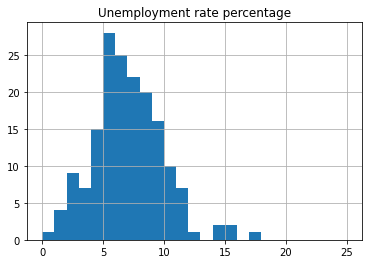

In [35]:
# Draw histogram of unemployment rate
ax = recent_grads["Unemployment_rate%"].hist(bins = 25, range = (0, 25))
ax.set_title("Unemployment rate percentage");

Looking at the plot above we can see that about 65% of the majors have an unemployment rate which is lower than 8%. These numbers seem pretty encouraging, especially if we compare them with the data released by the [Bureau of Labor Statistics](https://www.bls.gov/charts/employment-situation/civilian-unemployment-rate.htm) which, for the years 2010-2012, recorded national unemployment rates ranging from 7.7% to 9.9%.

Let's check next if the unemployment rates are correlated to the median salary in any meaningful way. 

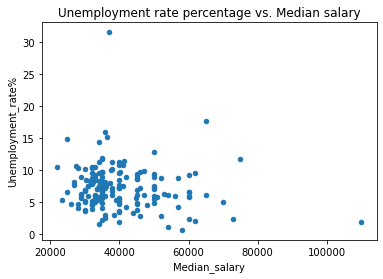

In [36]:
# Draw Unemployment rate percentage vs. Median salary scatterplot
ax = recent_grads.plot(x = "Median_salary", y = "Unemployment_rate%", kind = "scatter")
ax.set_title("Unemployment rate percentage vs. Median salary");

It looks like there is no correlation between unemployment rate and median salary. Actually, if we focus on a median salary range (even a very small one) we can observe an extremely non uniform behavior for the unemployment rate values. 

Let's also check if the unemployment rate is influenced by the number of graduates in a major. One possible hypothesis could state that the unemployment rate would spike for those majors with a large number of graduates: ideally such a large population increases the competition and reduces the number of available jobs. 

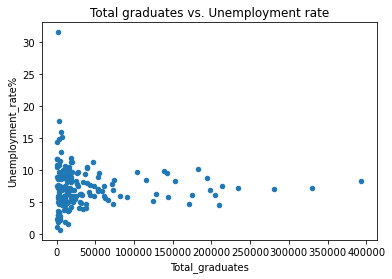

In [37]:
# Draw a Total graduates vs. Unemployment rate scatterplot
ax = recent_grads.plot(x = "Total_graduates", y = "Unemployment_rate%", kind = "scatter")
ax.set_title("Total graduates vs. Unemployment rate");

The scatterplot above shows that there is actually no correlation between unemployment rate and total number of graduates. The speculation we made above is therefore incorrect.

Since we haven't found any meaningful correlation, let's focus on the distribution of the unemployment rate values themselves.

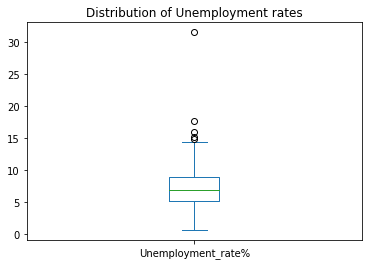

In [38]:
# Draw distribution of Unemplyment_rate% using a boxplot 
ax = recent_grads["Unemployment_rate%"].plot(kind = "box")
ax.set_title("Distribution of Unemployment rates");

From this box plot we see see that the median unemployment rate is close to 7%. Moreover, the interquartile range is less than 4% which means that the values are not too spread out. We also notice a few upper outliers. Let's analyze these outliers in more details. 

In [39]:
# Find the exact value of the Inter Quartile Range
IQT = recent_grads["Unemployment_rate%"].quantile(0.75) - recent_grads["Unemployment_rate%"].quantile(0.25)

In [40]:
# Find the upper outliers of the Unemployment_rate% column
upper_outliers = recent_grads["Unemployment_rate%"] > recent_grads["Unemployment_rate%"].quantile(0.75) + IQT * 1.5
recent_grads[upper_outliers].sort_values(by = "Unemployment_rate%", ascending = False)

,Rank,Major_code,Major,Total_graduates,Men_graduates,Women_graduates,Major_category,Women_graduates%,Sample_size,Total_employed,Full_time_employed,Part_time_employed,Full_time_year_round,Unemployed,Unemployment_rate%,Median_salary,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
83,84,3602,BOTANY,1329.0,626.0,703.0,Biology & Life Science,52.896915,9,1010,946,169,740,319.0,31.584158,37000,26000,40000,677,184,56
5,6,2418,NUCLEAR ENGINEERING,2573.0,2200.0,373.0,Engineering,14.496697,17,1857,2038,264,1449,400.0,17.722641,65000,50000,102000,1142,657,244
89,90,5401,PUBLIC ADMINISTRATION,5629.0,2947.0,2682.0,Law & Public Policy,47.646118,46,4158,4148,847,2952,789.0,15.949060,36000,23000,60000,919,2313,496
84,85,2107,COMPUTER NETWORKING AND TELECOMMUNICATIONS,7613.0,5291.0,2322.0,Computers & Mathematics,30.500460,97,6144,5495,1447,4369,1100.0,15.184981,36400,27000,49000,2593,2941,352
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,79.985906,13,2101,1724,648,1293,368.0,14.904820,25000,25000,40000,986,870,622


It's kind of surprising how spread out are the ranks of these majors: one of them is in 6th place, another one is second to last and the remaning ones are right in the middle.

These insight, together with the lack of strong correlations witnessed by the scatterplots we created, suggests that the unemployment rates might be influenced by issues that pertain each major individually (like for example shortage of funds or seasonality of a job).

---
# Conclusions

In this project we used data visualization to analyze and retrieve some insights about the professional life of US graduates over the 2010-2012 period and across different majors. In particular, we were able to draw the following conclusions:   

1. The majority of employed new graduates has a median salary that ranges between \\$33,300 and \\$36,600.
2. The major categories that give access to the highest paying jobs are *Engineering*, *Business*, *Computers & Mathematics*, *Law & Public Policy* and *Physical Science*. More in general we see a dominance of STEM fields over Humanities and Social Sciences.
3. There is no correlation between median salary and total number of graduates. This means that the most popular majors don't necessarily coincide with the richest ones.
4. About 56% of all majors have more women graduates than men. However, when we group by major category, the gender imbalance gets more extreme: only 6 out of the 16 different categories are predominantly male.
5. There is a strong disproportion regarding the richest majors. In particular, all top 5 majors are predominantly male and all bottom 5 majors are predominantly female. A similar polarizing situation appears if we use major categories instead.
6. More than half of the majors report an unemployment rate among new graduates which is below 8%. This is lower than the unemployment rates recorded nationally in the US during the same time span.
7. Unemployment rates are related neither to median salary nor to total number of graduates. In particular, high unemployment rates are recorded in top ranked majors as well as very low ranked majors. We infer that unemployment rates might be influenced by factors that are uniquely specific to each major.   